# Chapter 6
## Decision Trees

# Training and Visualizing a Decision Tree

In [1]:
# load the libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
# load the data
iris = load_iris(as_frame=True)
X=iris.data
y=iris.target

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [5]:
# train the data
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [6]:
tree_clf.classes_

array([0, 1, 2])

In [7]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [28]:
import matplotlib.pyplot as plt
X,y = make_moons(n_samples=500,noise = 0.3,random_state=42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=42)

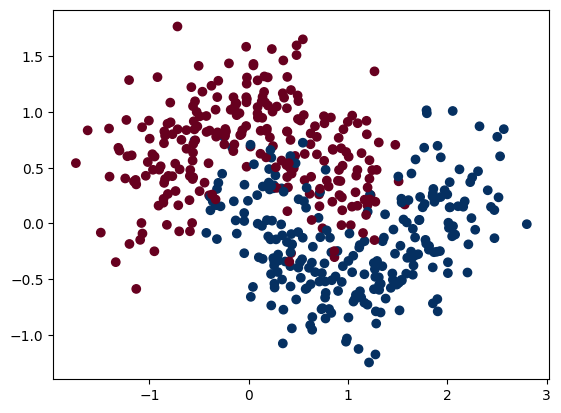

In [29]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='RdBu')
plt.show()

In [30]:
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf =5, random_state=42)

tree_clf1.fit(X,y)
tree_clf2.fit(X,y)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [31]:
import numpy as np

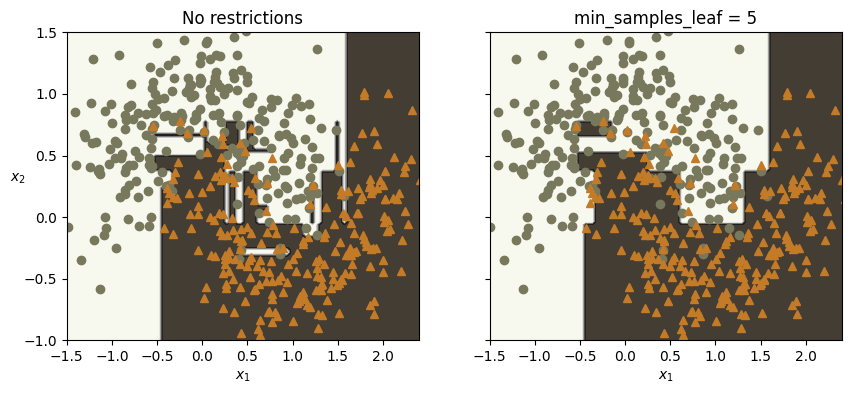

In [32]:
def plot_decision_boundary(clf,X,y,axes,cmap):
    x1,x2=np.meshgrid(np.linspace(axes[0],axes[1],100),
                      np.linspace(axes[2],axes[3],100))
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=cmap)
    plt.contourf(x1,x2,y_pred,cmap='Greys',alpha=0.8)
    colors=  {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X, y,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X, y,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

## 7. Train and fine-tune a Decision Tree for the moons dataset.

In [37]:
X,y=make_moons(n_samples=10000,noise=0.4,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=42)

In [39]:
from sklearn.model_selection import cross_val_score,GridSearchCV
tree_reg = DecisionTreeClassifier(random_state=42)
params= {
    'max_leaf_nodes':list(range(2,100)),
    'max_depth':list(range(1,7)),
    'min_samples_split':[2,3,4]
}
grid_search_CV = GridSearchCV(tree_reg,
                              params,
                              cv=3)
grid_search_CV.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [41]:
grid_search_CV.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

In [43]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_CV.predict(X_test)
accuracy_score(y_test, y_pred)

0.8595

In [45]:
from sklearn.model_selection import ShuffleSplit

In [46]:
n_trees=1000
n_instances = 100
rs=ShuffleSplit(n_splits=n_trees,test_size=len(X_train)-n_instances,random_state=42)

rs

ShuffleSplit(n_splits=1000, random_state=42, test_size=7900, train_size=None)

In [48]:
mini_sets=[]
for min_train_index,mini_test_index in rs.split(X_train):
    X_mini_train=X_train[min_train_index]
    y_mini_train=y_train[min_train_index]
    mini_sets.append((X_mini_train,y_mini_train))

In [50]:
from sklearn.base import clone

forest = [clone(grid_search_CV.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8056605

In [51]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [52]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [53]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.873